## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [2]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report

## Do the two You Try problems from the lecture. 

- Open the Day14_KnnLinearModels.ipynb code and run it.
- Do the two you try problems to make sure you understand the models and over vs. under fitting.


---------------
## Regularization - Day15 HW

Today we are going to do apply regularization to linear or polynomial regression results of life expectancy data:

[https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

**This is the same dataset as day 14**

On Day 14 you did a full analysis of this data starting with a description of the data and a full Exploratory Data Analysis. Then you picked a model and talked about your logic for that model. 

Today, you will do a regression model (Linear or Polynomial) and apply regularization to your results to see if you can improve your analysis.

NOTE: Remember the regularization we learned (Ridge, Lasso, Elastic Net) will not work with KNN since it is a distance based model rather than a model with continuous coefficients.


Please write up your conclusions:

- Show both a regularized and and un-regularized model.
- Talk about what regularization you picked and why.
- What was the effect of regularization on your results. Eg generalization, over vs undertraining.
- Make sure you are plotting results (MSE, R^2 for training and testing sets.)

**Your final notebooks should:**

- [ ] Be a completely new notebook with just the Day14 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] **Show one model without regularization and one with - talk about what regularization did for your model**
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)

file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file) 
df

/Users/sethchairez/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Path to dataset files: /Users/sethchairez/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [14]:
df.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [17]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [60]:
#Drop the naas in life expectancy
df_new = df[df['Life expectancy '].notna()]
df_new['Life expectancy '].isna().sum()

0

In [101]:
df.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [109]:
X_col = ['infant deaths', 'percentage expenditure',
       'Measles ', 'under-five deaths ' , ' HIV/AIDS'] 
y_col = ['Life expectancy ']
X = df_new[X_col]
y = df_new[y_col]

In [113]:
random_seed = 42
# First split: hold out test data
X_train, X_test_full, y_train, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=random_seed
)

# Second split: create a validation set from the testing data
X_test, X_val, y_test, y_val = train_test_split(
    X_test_full, y_test_full, test_size=0.5, random_state=random_seed
)

In [115]:
degree = 1
poly = PolynomialFeatures(degree=degree,include_bias=False)
X_train_poly = poly.fit_transform(X_train)
# transform the validation set
X_val_poly = poly.transform(X_val)


# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

Train: 2342, Validation: 293, Test: 293


In [98]:
y_pred_train = linreg.predict(X_train_poly)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f"MSE on train set: {mse:.3f}")
print(f"R² on train set: {r2:.3f}")

# --- Get predictions TTesting ---
y_pred_val = linreg.predict(X_val_poly)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"MSE on val set: {mse:.3f}")
print(f"R² on val set: {r2:.3f}")

MSE on train set: 45.544
R² on train set: 0.503
MSE on val set: 44.715
R² on val set: 0.466


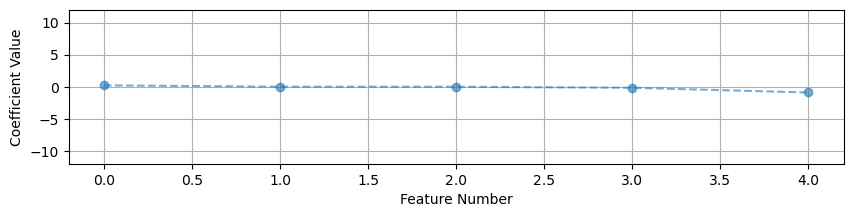

In [121]:
coef = linreg.coef_
coef_linreg_noscale = coef.reshape(-1)

x_pos = range(poly.n_output_features_)
plt.figure(figsize=(10,2))
plt.plot(x_pos, coef_linreg_noscale, '--o', alpha=.6)
plt.grid()
plt.ylim(-12,12)
plt.ylabel('Coefficient Value')
plt.xlabel('Feature Number')
plt.show()

In [127]:
pd.DataFrame(X_train,columns= X_col).agg(['max', 'min'])

,infant deaths,percentage expenditure,Measles,under-five deaths,HIV/AIDS
max,1800,19479.91161,212183,2500,50.6
min,0,0.00000,0,0,0.1
